In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [3]:
# Examine DataFrame
print example_df

  above_three   even  value
a       False  False      1
b       False  False      3
c       False   True      2
d        True   True      4
e       False  False      1
f        True   True      6
g        True   True      4


In [4]:
# Examine groups
grouped_data = example_df.groupby('even')
# The groups attribute is a dictionary mapping keys to lists of row indexes
print grouped_data.groups

{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}


In [5]:
#multiple columns
grouped_data = example_df.groupby(['even', 'above_three'])
print grouped_data.groups

{(True, False): Index([u'c'], dtype='object'), (False, False): Index([u'a', u'b', u'e'], dtype='object'), (True, True): Index([u'd', u'f', u'g'], dtype='object')}


In [6]:
# Get sum of each group
grouped_data = example_df.groupby('even')
print grouped_data.sum()

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [7]:
grouped_data = example_df.groupby('even')
print grouped_data.sum()['value']
print '\n'
print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int64


even
False     5
True     16
Name: value, dtype: int64


In [9]:
filename = '/Users/aishwaryachinnari/Desktop/myproj/udacity/csv_files/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

In [10]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [12]:
subway_df.groupby('day_week').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


In [14]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

Populating the interactive namespace from numpy and matplotlib


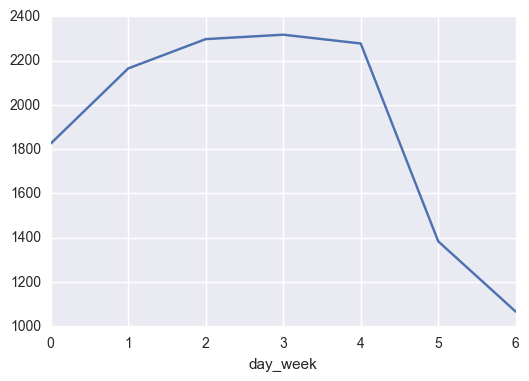

In [16]:
%pylab inline
import seaborn as sns
ridership_by_day.plot()

In [17]:
import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

In [18]:
weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [22]:
subway_df.head(3)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564


In [21]:
weather_df.head(3)

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9


In [24]:
subway_df.merge(weather_df, on= ['DATEn','hour','latitude','longitude'],how='inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


In [26]:
subway_df.merge(weather_df, left_on=['DATEn','hour','latitude','longitude'],right_on =['DATEn','hour','latitude','longitude'] ,how='inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0
